# plot density and fields versus parallel coordinate z

- Antenna driving by $\delta B_\parallel$.
- $A_\parallel=0$

In [50]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

## Density plots first

Import dataset

In [88]:
data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_slow_1/'
nc1_path = data_dir + 'lin_slow_1.fullmom.nc'

# data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_alf_1/'
# nc1_path = data_dir + 'lin_alf_1.fullmom.nc'

In [89]:
ds1 = Dataset(nc1_path)

In [90]:
densf0 = ds1['densf0']
z = ds1['theta']
densf0

<class 'netCDF4._netCDF4.Variable'>
float64 densf0(nt, nspec, nky, nkx, ntheta, ri)
unlimited dimensions: nt
current shape = (51, 2, 1, 1, 33, 2)
filling off

In [91]:
nt = 5

ni = densf0[nt, 0,0,0,:,0] + densf0[nt, 0,0,0,:,1] * 1j

In [92]:
ne = densf0[nt, 1,0,0,:,0] + densf0[nt, 1,0,0,:,1] * 1j

In [93]:
ti_te = 1
kperp_rhoi = 0.2
wbar_0 = .2
bi = 0.01
bpar0 = 10
mi_me = 1836
dt = 0.01

texts = "{0}{1}\n".format(r'$\beta_i=$',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1:.1f}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1:.1f}\n".format(r'$\delta B_{\mathbf{k}\parallel 0}=$', bpar0) +\
    "{0}{1:.1f}\n".format(r'$\overline{\omega}_0=$',wbar_0) + \
    "{0}{1}\n".format(r'$\delta t k_\parallel v_{ti}=$',dt)

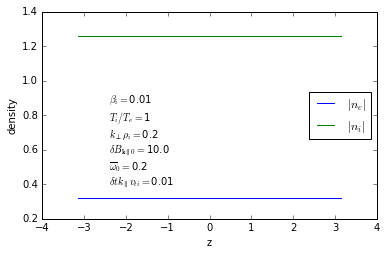

In [110]:
fig_nz = plt.figure(figsize=[6, 6*0.618])
plt.plot(z, np.abs(ne), label = '$|n_e|$')
plt.plot(z, np.abs(ni), label = '$|n_i|$')
plt.legend(loc = 'center right')
plt.xlabel('z')
plt.ylabel('density')
ax = plt.gca()
plt.text(0.2, 0.1, texts, transform=ax.transAxes,)
plt.show()

In [95]:
(np.abs(ni)/np.abs(ne))

array([ 3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535,  3.89508535,  3.89508535,
        3.89508535,  3.89508535,  3.89508535])

## then plot fields

In [97]:
data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_slow_1/'
field1_path = data_dir + 'lin_slow_1.fields'

In [99]:
field1 = np.loadtxt(field1_path)

In [101]:
z = field1[:, 0]
phi = np.abs(field1[:, 3] + 1j * field1[:, 4])
bpar = np.abs(field1[:, 7] + 1j * field1[:, 8])

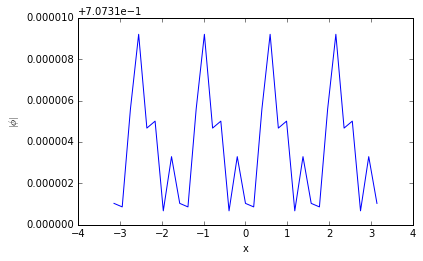

In [106]:
fig_phiz = plt.figure(figsize=[6, 6*0.618])
plt.plot(z, phi)
plt.xlabel('x')
plt.ylabel('$|\phi|$')
plt.show()

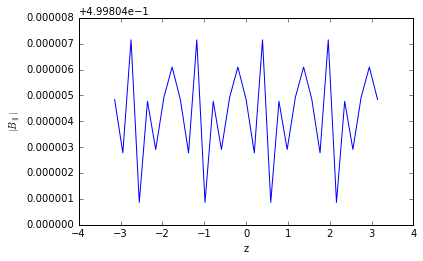

In [107]:
fig_bparz = plt.figure(figsize=[6, 6*0.618])
plt.plot(z, bpar)
plt.xlabel('z')
plt.ylabel('$|B_\parallel|$')
plt.show()

In [111]:
/